In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv(r'/2021_OPM_FEVS_PRDF.csv)
df = pd.read_csv(r'/home/brady/dataBC/code-2022/2022Project/FEVS2021_PRDF_CSV/2021_OPM_FEVS_PRDF.csv')
## Checking if there are any duplicate values
df


,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292515,154057939422,ST,3.0,4.0,4.0,3.0,4,4,2,4,...,B,B,B,A,A,A,B,B,A,3.004992
292516,151758964104,ST,3.0,4.0,2.0,4.0,2,2,3,3,...,B,B,B,A,A,A,B,B,D,4.427855
292517,143492802997,ST,3.0,3.0,NaN,4.0,4,4,4,3,...,NaN,NaN,NaN,NaN,NaN,A,A,NaN,A,4.202227
292518,110267537558,ST,2.0,4.0,5.0,5.0,2,1,5,4,...,B,B,B,A,A,A,B,B,C,3.523113


In [3]:
df.drop_duplicates() ##dropping all the duplicate values
print()
print(df.info())  ##checking the data types of every column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        291074 non-null  float64
 3   Q2        288624 non-null  float64
 4   Q3        290112 non-null  float64
 5   Q4        291324 non-null  float64
 6   Q5        290770 non-null  object 
 7   Q6        286449 non-null  object 
 8   Q7        290240 non-null  object 
 9   Q8        291451 non-null  object 
 10  Q9        291910 non-null  float64
 11  Q10       292038 non-null  object 
 12  Q11       292018 non-null  object 
 13  Q12       291755 non-null  object 
 14  Q13       291920 non-null  object 
 15  Q14       291306 non-null  object 
 16  Q15       288257 non-null  object 
 17  Q16       290367 non-null  object 
 18  Q17       290268 non-null  object 
 19  Q18       291274 non-null  object 
 20  Q19

In [4]:
## There are certain variables which should be nature but they are not because some of the entries have string value.
df_c  = df.copy()
objects= [column for column, is_type in (df_c.dtypes=="object").items() if is_type] ## Extracting out all the value which should be integar but is not
## The column 'agency' holds no significance here so it is to be dropped.
objects.remove('agency')
for i in objects:
    df_c[i] = df_c[i].replace(['X'], np.nan)
    df_c[i] = df_c[i].replace(np.nan, 0)
df_c.isnull().sum().sum()

276131

In [5]:
objects[:-9]
for i in objects[:-9]:
    df_c[i] = df_c[i].astype(float)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        291074 non-null  float64
 3   Q2        288624 non-null  float64
 4   Q3        290112 non-null  float64
 5   Q4        291324 non-null  float64
 6   Q5        292520 non-null  float64
 7   Q6        292520 non-null  float64
 8   Q7        292520 non-null  float64
 9   Q8        292520 non-null  float64
 10  Q9        291910 non-null  float64
 11  Q10       292520 non-null  float64
 12  Q11       292520 non-null  float64
 13  Q12       292520 non-null  float64
 14  Q13       292520 non-null  float64
 15  Q14       292520 non-null  float64
 16  Q15       292520 non-null  float64
 17  Q16       292520 non-null  float64
 18  Q17       292520 non-null  float64
 19  Q18       292520 non-null  float64
 20  Q19 

In [6]:
df_c = df_c.dropna()
df_c.isnull().sum().sum() ##-> No missing values found in the dataset

0

In [7]:
print('The number of survey entries altered:',df.shape[0]-df_c.shape[0]) 
print('The percentage of alterations from the original dataset is: ',round(((df.shape[0]-df_c.shape[0])/(df.shape[0])),2)*100,'%')

The number of survey entries altered: 54401
The percentage of alterations from the original dataset is:  19.0 %


In [8]:
#check
df_ca = df_c.copy()
for i in df_ca.columns.values:
        df_ca[i] = df_ca[i].replace(0,df_ca[i].value_counts().idxmax())

        
df_ca.head(20)

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,...,A,B,B,B,B,A,A,A,A,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,...,B,B,B,B,B,B,A,A,A,1.735842
5,195312241136,XX,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,...,A,B,B,B,A,B,B,A,A,2.076046
6,187815423862,XX,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,B,B,B,B,B,B,A,A,A,1.858874
7,174698178690,XX,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,...,B,B,B,B,A,B,B,B,C,1.089288
9,138139604049,XX,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,...,B,B,A,B,B,A,A,A,A,1.228573
10,172119452278,XX,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,...,B,B,B,B,B,C,A,A,A,1.735842
11,102302785265,XX,4.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,...,B,B,B,B,B,B,A,A,A,1.228573


In [9]:
df_ca['DLEAVING'].value_counts()

A    160269
C     36912
B     29899
D     11039
Name: DLEAVING, dtype: int64

In [10]:
df_ca.loc[df_ca.DLEAVING=='C']

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
2,152966380283,XX,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,...,B,B,B,B,A,B,A,B,C,1.858874
7,174698178690,XX,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,...,B,B,B,B,A,B,B,B,C,1.089288
13,105078979724,XX,2.0,3.0,3.0,4.0,1.0,2.0,4.0,3.0,...,B,B,B,B,B,A,A,B,C,2.209652
15,146904434378,XX,1.0,1.0,5.0,1.0,4.0,2.0,5.0,5.0,...,B,B,B,B,A,B,A,A,C,2.209652
21,191607232108,XX,2.0,3.0,5.0,5.0,2.0,4.0,3.0,2.0,...,B,B,B,B,B,B,A,A,C,1.735842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292401,149388396809,ST,4.0,4.0,4.0,4.0,2.0,2.0,2.0,4.0,...,B,B,B,A,B,A,A,B,C,3.957027
292435,183028010363,ST,2.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,...,B,B,B,A,B,B,B,B,C,2.705716
292440,148021669661,ST,4.0,4.0,3.0,4.0,1.0,4.0,4.0,5.0,...,B,A,B,A,A,A,B,B,C,1.955644
292486,185461910015,ST,1.0,2.0,1.0,3.0,4.0,1.0,5.0,1.0,...,A,B,B,A,B,A,B,B,C,4.662723


In [11]:
# df_ca_a = df_ca.loc[df_ca.DLEAVING=='A']

# cols = df_ca_a.columns[2:45]
# objects = [column for column, is_type in (df_ca_a.dtypes=="float").items() if is_type]

# for i in objects:
#     plt.figure(figsize=(20,40))
#     sns.countplot(data=df_ca_a[cols],y=df_ca_a['agency'],hue=i)
#     plt.plot()

# plt.savefig("dLeavingB.png")

In [12]:
#below cells compare pearson and kendall correlations matricies to judge if 
#algorithims using pearson will be meaningful for our Likert data

In [13]:
# print(df_ca.iloc[:, 2:69].shape)
# cr = df_ca.iloc[:, 2:69].corr()
# cr
# #np.asarray(cr)
# #cr.corr
# sns.heatmap(cr)

In [14]:
# crk = df_ca.iloc[:, 2:69].corr(method='kendall')

# sns.heatmap(crk)

In [15]:
#Naive application of KMeans to questions to look for clusters
from sklearn.cluster import KMeans

In [64]:
## a loop to record inertias
#default n_init=10 gives varrying results
inertias = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, 
                random_state=456,
               n_init=50)
    kmeans.fit(df_ca.iloc[:, 2:69])
    
    ## you can get the inertia from a fit KMeans object
    ## with .inertia_
    inertias.append(kmeans.inertia_)

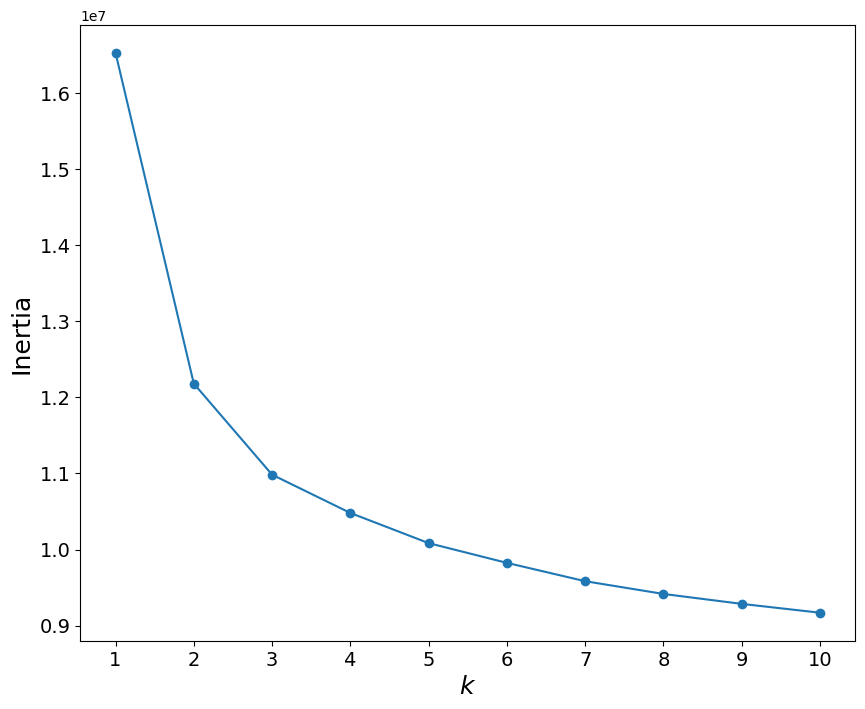

In [65]:
plt.figure(figsize=(10,8))

plt.plot(range(1,11), inertias, '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)

plt.xticks(range(1,11),fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [192]:
#look at k=2
kmeans = KMeans(n_clusters=2, 
                random_state=456,
               n_init=50)

kmeans.fit(df_ca.iloc[:, 2:69])

KMeans(n_clusters=2, n_init=50, random_state=456)

In [193]:
k2p = kmeans.predict(df_ca.iloc[:, 2:69])

In [167]:
len(k2p)

238119

In [183]:
#make yes/no leave column to compare clusters to responses for leaving
#0 = not leaving, 1 = leaving for some reason [B,C,D]
df_ca['leaveYN']=0
df_ca.loc[df_ca.DLEAVING !='A', 'leaveYN']=1

#make leave column to compare clusters to all responses for leaving
#0 = not leaving, 1 = leaving other, 2= leaving federal, 3 =leaving outside
df_ca['leaveabcd']=0
df_ca.loc[df_ca.DLEAVING =='B', 'leaveabcd']=1
df_ca.loc[df_ca.DLEAVING =='C', 'leaveabcd']=2
df_ca.loc[df_ca.DLEAVING =='D', 'leaveabcd']=3

#make leave column to combine A and C answers 
#0 = not leaving & leaving federal, 1 = leaving other & leaving outside
df_ca['leaveAC']=0
df_ca.loc[df_ca.DLEAVING =='B', 'leaveAC']=1
df_ca.loc[df_ca.DLEAVING =='C', 'leaveAC']=0
df_ca.loc[df_ca.DLEAVING =='D', 'leaveAC']=1

#make leave column to combine B and D with A seperate and C seperate 
#0 = not leaving, 1 = leaving federal, 2 = leaving other & leaving outside
df_ca['leave3BD']=0
df_ca.loc[df_ca.DLEAVING =='B', 'leave3BD']=2
df_ca.loc[df_ca.DLEAVING =='C', 'leave3BD']=1
df_ca.loc[df_ca.DLEAVING =='D', 'leave3BD']=2

#make leave column to combine A and B with C seperate and D seperate 
df_ca['leave3AB']=0
df_ca.loc[df_ca.DLEAVING =='B', 'leave3AB']=0
df_ca.loc[df_ca.DLEAVING =='C', 'leave3AB']=1
df_ca.loc[df_ca.DLEAVING =='D', 'leave3AB']=2

#make leave column to combine A and C with B seperate and D seperate 
df_ca['leave3AC']=0
df_ca.loc[df_ca.DLEAVING =='B', 'leave3AC']=1
df_ca.loc[df_ca.DLEAVING =='C', 'leave3AC']=0
df_ca.loc[df_ca.DLEAVING =='D', 'leave3AC']=2

#make leave column to combine B and C with A seperate and D seperate 
df_ca['leave3BC']=0
df_ca.loc[df_ca.DLEAVING =='B', 'leave3BC']=1
df_ca.loc[df_ca.DLEAVING =='C', 'leave3BC']=1
df_ca.loc[df_ca.DLEAVING =='D', 'leave3BC']=2

len(df_ca.DLEAVING)==len(k2p)

#df_ca.leaveabcd.value_counts()

True

In [184]:
from sklearn.metrics import accuracy_score

In [194]:
#leaveYN only useful for k=2 clusters
#leaveabcd only for k=4
accuracy_score(df_ca.leaveYN, k2p)


0.7169272506603841

In [51]:
#df_ca['']

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT,leaveYN
0,112970976817,XX,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,...,B,B,B,B,A,A,A,A,2.209652,0
2,152966380283,XX,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,...,B,B,B,A,B,A,B,C,1.858874,1
3,193041162980,XX,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,B,A,B,B,B,A,A,A,1.228573,0
4,146655962451,XX,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,...,B,B,B,B,B,A,A,A,1.735842,0
5,195312241136,XX,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,...,B,B,B,A,B,B,A,A,2.076046,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292514,117508083776,ST,3.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,...,B,B,A,A,A,A,B,A,3.487832,0
292515,154057939422,ST,3.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,...,B,B,A,A,A,B,B,A,3.004992,0
292516,151758964104,ST,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,...,B,B,A,A,A,B,B,D,4.427855,1
292518,110267537558,ST,2.0,4.0,5.0,5.0,2.0,1.0,5.0,4.0,...,B,B,A,A,A,B,B,C,3.523113,1
